### Prediction of MPG

    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mpg = sns.load_dataset("mpg")

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


    X - Features on the basis of which target can estimated
    y - target / label which we want to predict using ML model

In [6]:
mpg.head().drop([1, 3, 4])
# axis=0, delete rows by default using row indexes

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite


In [7]:
mpg.head().drop(["mpg", "name", "origin"], axis=1)
# axis=1, delete columns using column indexes

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [8]:
mpg.head().drop("mpg", axis=1)
# features selection

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
mpg.drop(["mpg", "cylinders", "model_year", "origin", "name"], axis=1).head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [10]:
X = mpg.drop("mpg", axis=1)
y = mpg["mpg"]

In [12]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [13]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

#### Hypothesis or Objective

    mileage of a vechile can be predicted using it's features like no of cylinders, horse power,
    displacement, weight, acceleration, model_year, origin and manufractuer name

#### Sampling

    picking training and testing data
    
#### EDA

    feature selection
    hyothesis testing
    
#### Data Modeling 

    preparing data for machine learning models
    
        1. Fix Missing Values
        2. Fix Outliers
        3. Convert Categorical / Text to a numerical form
        4. Scaling
        5. Feature Engineering 
                    1) Feature Selection -> drop irrelevent features and select important features
                    2) Feature Embedding -> we can combine multiplie feature using a logical relation
                                            to form a new feature 
     
#### Training ML model
    
        select and train a machine learning model
        
#### Hyper-parameter Tuning 

        improving performance of ML model by selecting best value for hyper parameters
        
#### Deployment ML Model

        integrate a machine learning model with real time application and make it live

#### Sampling 

    choosing test and train set from population of given data in such way that train and test data is distinct

In [21]:
X.shape[0]

398

In [24]:
X.shape[0] * 0.1

39.800000000000004

In [15]:
from sklearn.model_selection import train_test_split
# random sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [16]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [17]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b


In [18]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

In [19]:
X_train[num_features].corrwith(y_train)

displacement   -0.808184
horsepower     -0.775395
weight         -0.833607
acceleration    0.417611
dtype: float64

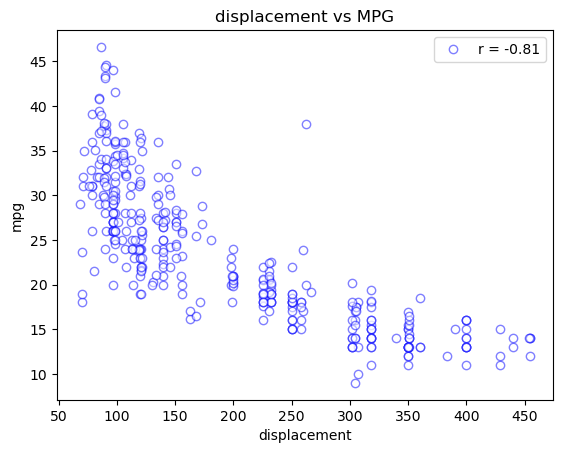

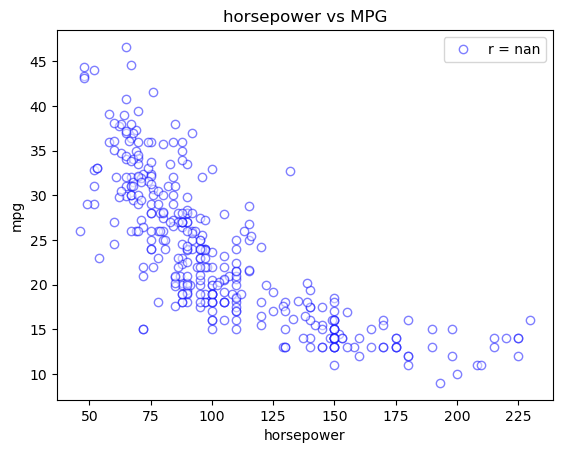

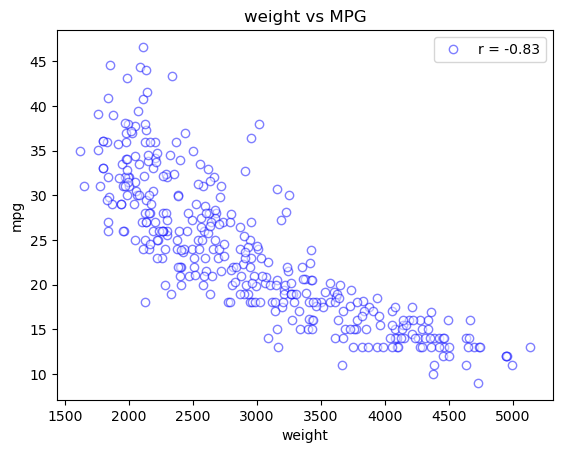

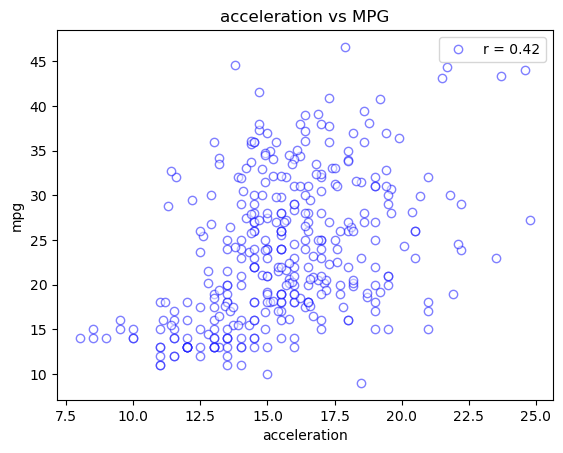

In [21]:
for column in num_features:
    r = np.corrcoef(X_train[column], y_train)[0, 1]
    plt.plot(X_train[column], y_train, "ob", mfc="white",
             alpha=0.5, label=f"r = {r:0.2f}")
    plt.xlabel(column)
    plt.ylabel("mpg")
    plt.title(f"{column} vs MPG")
    plt.legend()
    plt.show()

In [22]:
df = X_train.copy()
df["mpg"] = y_train

In [23]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg
178,4,120.0,88.0,2957,17.0,75,europe,peugeot 504,23.0
299,4,141.0,71.0,3190,24.8,79,europe,peugeot 504,27.2
360,6,145.0,76.0,3160,19.6,81,europe,volvo diesel,30.7
313,4,151.0,90.0,2678,16.5,80,usa,chevrolet citation,28.0
52,4,88.0,76.0,2065,14.5,71,europe,fiat 124b,30.0


In [24]:
df.groupby("cylinders")["mpg"].describe().sort_values("mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
cylinders,,,,,,,,
4,183.0,29.507104,5.743980,19.0,25.000,29.00,33.250,46.6
5,2.0,28.350000,11.384419,20.3,24.325,28.35,32.375,36.4
3,4.0,20.550000,2.564501,18.0,18.750,20.25,22.050,23.7
6,79.0,20.013924,3.861969,15.0,18.000,19.00,21.000,38.0
8,90.0,14.694444,2.441604,9.0,13.000,14.00,16.000,23.9


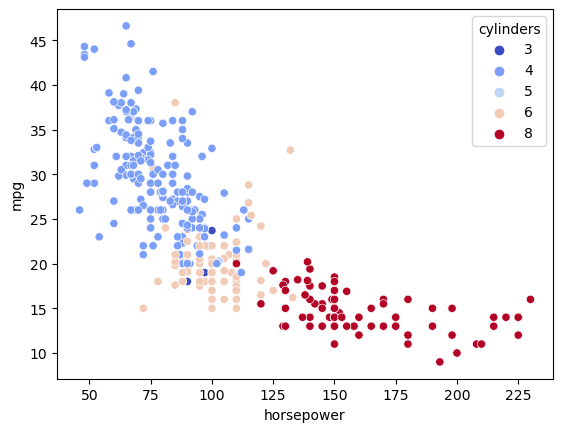

In [25]:
sns.scatterplot(x="horsepower", y="mpg", hue="cylinders", data=df,
               palette="coolwarm")
plt.show()

In [26]:
df.groupby("model_year")["mpg"].describe()\
.style.background_gradient(cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,25.000000,17.840000,5.312564,9.000000,14.000000,16.000000,22.000000,27.000000
71,26.000000,21.269231,6.557790,12.000000,16.250000,19.000000,26.750000,35.000000
72,25.000000,18.800000,5.693564,11.000000,13.000000,19.000000,23.000000,28.000000
73,37.000000,16.945946,4.570108,11.000000,13.000000,16.000000,20.000000,29.000000
74,25.000000,22.320000,6.511016,13.000000,16.000000,24.000000,26.000000,32.000000
75,26.000000,20.346154,5.027463,13.000000,16.250000,19.500000,23.000000,33.000000
76,32.000000,21.500000,5.857171,13.000000,17.250000,21.000000,26.125000,33.000000
77,25.000000,23.800000,6.796139,15.000000,17.500000,22.000000,30.000000,36.000000
78,29.000000,24.124138,7.320941,16.200000,19.400000,20.600000,27.500000,43.100000


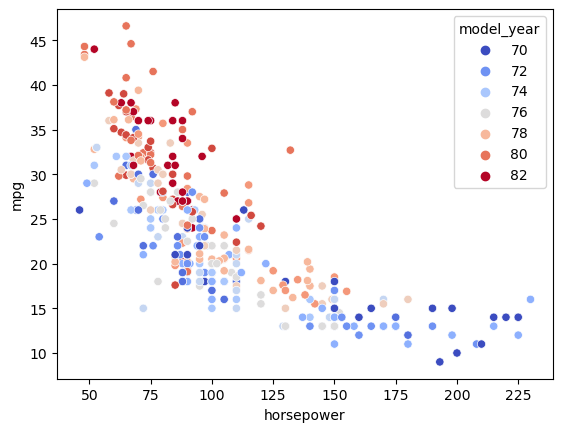

In [27]:
sns.scatterplot(x="horsepower", y="mpg", hue="model_year", data=df,
               palette="coolwarm")
plt.show()

In [28]:
df.groupby("origin")["mpg"].describe()\
.style.background_gradient(cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
europe,60.000000,28.111667,7.065315,16.200000,23.000000,27.000000,31.125000,44.300000
japan,75.000000,30.260000,6.168096,18.000000,25.200000,31.300000,33.950000,46.600000
usa,223.000000,20.117040,6.526431,9.000000,15.000000,18.500000,24.400000,39.000000


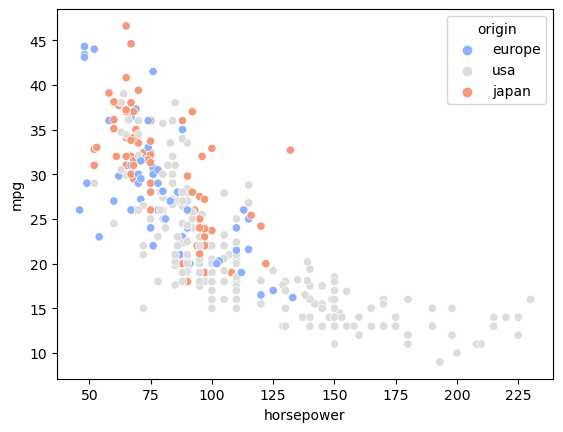

In [29]:
sns.scatterplot(x="horsepower", y="mpg", hue="origin", data=df,
               palette="coolwarm")
plt.show()

In [30]:
X_train[num_features].corr().style.background_gradient(cmap="coolwarm")

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.898815,0.932052,-0.549561
horsepower,0.898815,1.000000,0.863924,-0.690146
weight,0.932052,0.863924,1.000000,-0.419567
acceleration,-0.549561,-0.690146,-0.419567,1.000000


In [31]:
df["dhw"] = (df["displacement"]+df["horsepower"])+df["weight"]

In [32]:
df.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,dhw
cylinders,1.000000,0.948899,0.842235,0.897663,-0.504459,-0.370957,-0.782206,0.912510
displacement,0.948899,1.000000,0.898815,0.932052,-0.549561,-0.389419,-0.808184,0.948584
horsepower,0.842235,0.898815,1.000000,0.863924,-0.690146,-0.424870,-0.775395,0.882618
weight,0.897663,0.932052,0.863924,1.000000,-0.419567,-0.314186,-0.833607,0.998677
acceleration,-0.504459,-0.549561,-0.690146,-0.419567,1.000000,0.285543,0.417611,-0.448157
model_year,-0.370957,-0.389419,-0.424870,-0.314186,0.285543,1.000000,0.580747,-0.332643
mpg,-0.782206,-0.808184,-0.775395,-0.833607,0.417611,0.580747,1.000000,-0.838537
dhw,0.912510,0.948584,0.882618,0.998677,-0.448157,-0.332643,-0.838537,1.000000


In [33]:
df["name"].nunique() # 398 -> 281

281

In [35]:
print(*df["name"].unique(), sep="\n")

peugeot 504
volvo diesel
chevrolet citation
fiat 124b
oldsmobile cutlass supreme
ford granada gl
pontiac lemans v6
oldsmobile delta 88 royale
renault lecar deluxe
pontiac catalina
chevrolet vega
buick century limited
plymouth horizon
saab 99le
datsun f-10 hatchback
amc spirit dl
amc ambassador brougham
ford ranger
pontiac astro
chevrolet chevette
ford fairmont futura
amc rebel sst
amc hornet
chevrolet malibu classic (sw)
amc gremlin
chevrolet nova
ford mustang ii
mazda rx-4
amc hornet sportabout (sw)
amc concord
datsun 710
plymouth reliant
plymouth volare premier v8
datsun 510 hatchback
chevrolet chevelle concours (sw)
renault 12 (sw)
chrysler lebaron medallion
datsun b-210
chevrolet chevelle malibu classic
buick skylark
dodge diplomat
audi 100ls
honda civic
ford pinto
chevrolet camaro
chrysler lebaron town @ country (sw)
plymouth duster
ford fairmont 4
ford escort 2h
ford gran torino (sw)
honda civic 1500 gl
ford fairmont
maxda glc deluxe
chevrolet vega (sw)
oldsmobile cutlass salon b

In [61]:
def process_string(value):
    map_d = {'maxda': 'mazda', 
    "toyouta":  "toyota",
    "vokswagen":  "vw",
    "volkswagen": "vw",}
    result = value.lower().strip().split(" ")
    name = result[0]
    if name in map_d.keys():
        name map_d[name]
    return name


In [37]:
process_string("vw taigun")

'vw'

In [38]:
process_string("   FoRD  Eco SPORTS")

'ford'

In [39]:
#df["company"] = df["name"].str.split(" ", expand=True)[0]

In [40]:
df["company"] = df["name"].apply(process_string)

In [41]:
df["company"].nunique()

34

    'maxda' -> 'mazda'

    "toyouta" -> "toyota"

    "vokswagen" -> "vw"

    "volkswagen" -> "vw"

In [42]:
map_dict = {
    'maxda': 'mazda', 
    "toyouta":  "toyota",
    "vokswagen":  "vw",
    "volkswagen": "vw",
    
}

In [43]:
df["origin"].map?

In [ ]:
df["origin"].map

In [44]:
df["origin"].map

<bound method Series.map of 178    europe
299    europe
360    europe
313       usa
52     europe
        ...  
213       usa
95        usa
32        usa
380     japan
131     japan
Name: origin, Length: 358, dtype: object>

In [45]:
df["company"].map(map_dict, )

178    NaN
299    NaN
360    NaN
313    NaN
52     NaN
      ... 
213    NaN
95     NaN
32     NaN
380    NaN
131    NaN
Name: company, Length: 358, dtype: object

In [46]:
df["origin"].unique()

array(['europe', 'usa', 'japan'], dtype=object)

In [47]:
m = {"europe": 1, "usa": 2, "japan": 3}
# map_dict = {"bad value": "good value", "good value": "good value"}

In [48]:
df["origin"].map(m)

178    1
299    1
360    1
313    2
52     1
      ..
213    2
95     2
32     2
380    3
131    3
Name: origin, Length: 358, dtype: int64

In [49]:
df["origin"]

178    europe
299    europe
360    europe
313       usa
52     europe
        ...  
213       usa
95        usa
32        usa
380     japan
131     japan
Name: origin, Length: 358, dtype: object

In [50]:
names = sorted(df["company"].unique())

In [51]:
print(*names, sep="\t")

amc	audi	bmw	buick	capri	chevrolet	chevy	chrysler	datsun	dodge	fiat	ford	hi	honda	maxda	mazda	mercedes-benz	mercury	nissan	oldsmobile	opel	peugeot	plymouth	pontiac	renault	saab	subaru	toyota	toyouta	triumph	vokswagen	volkswagen	volvo	vw


    df[df[col]=="bad value"][col] = "good value"

In [52]:
df[df["company"] == "maxda"]["company"] = "mazda"

C:\Users\Sachi\AppData\Local\Temp\ipykernel_16236\2110479188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["company"] == "maxda"]["company"] = "mazda"


In [53]:
for item in names.copy():
    if item in ['maxda' , "toyouta", "vokswagen", "volkswagen"]:
        names.remove(item)

In [54]:
map_dict.update(dict(zip(names, names)))

In [55]:
map_dict

{'maxda': 'mazda',
 'toyouta': 'toyota',
 'vokswagen': 'vw',
 'volkswagen': 'vw',
 'amc': 'amc',
 'audi': 'audi',
 'bmw': 'bmw',
 'buick': 'buick',
 'capri': 'capri',
 'chevrolet': 'chevrolet',
 'chevy': 'chevy',
 'chrysler': 'chrysler',
 'datsun': 'datsun',
 'dodge': 'dodge',
 'fiat': 'fiat',
 'ford': 'ford',
 'hi': 'hi',
 'honda': 'honda',
 'mazda': 'mazda',
 'mercedes-benz': 'mercedes-benz',
 'mercury': 'mercury',
 'nissan': 'nissan',
 'oldsmobile': 'oldsmobile',
 'opel': 'opel',
 'peugeot': 'peugeot',
 'plymouth': 'plymouth',
 'pontiac': 'pontiac',
 'renault': 'renault',
 'saab': 'saab',
 'subaru': 'subaru',
 'toyota': 'toyota',
 'triumph': 'triumph',
 'volvo': 'volvo',
 'vw': 'vw'}

In [56]:
df["company"] = df["company"].map(map_dict)

In [57]:
df["company"].nunique()

30

In [58]:
print(*sorted(df["company"].unique()), sep="\n")

amc
audi
bmw
buick
capri
chevrolet
chevy
chrysler
datsun
dodge
fiat
ford
hi
honda
mazda
mercedes-benz
mercury
nissan
oldsmobile
opel
peugeot
plymouth
pontiac
renault
saab
subaru
toyota
triumph
volvo
vw


In [59]:
df.groupby("company")["mpg"].describe()\
.style.background_gradient(cmap="coolwarm")


,count,mean,std,min,25%,50%,75%,max
company,,,,,,,,
amc,27.000000,18.366667,3.299067,13.000000,16.000000,18.000000,19.700000,27.400000
audi,5.000000,24.740000,6.740030,20.000000,20.300000,23.000000,24.000000,36.400000
bmw,2.000000,23.750000,3.181981,21.500000,22.625000,23.750000,24.875000,26.000000
buick,16.000000,19.275000,5.936834,12.000000,13.750000,18.750000,23.050000,30.000000
capri,1.000000,25.000000,nan,25.000000,25.000000,25.000000,25.000000,25.000000
chevrolet,38.000000,20.489474,6.221445,11.000000,15.625000,18.600000,26.500000,34.000000
chevy,3.000000,18.000000,11.357817,10.000000,11.500000,13.000000,22.000000,31.000000
chrysler,5.000000,17.620000,5.331229,13.000000,13.000000,17.600000,18.500000,26.000000
datsun,22.000000,31.081818,5.854314,22.000000,27.000000,32.000000,36.500000,40.800000


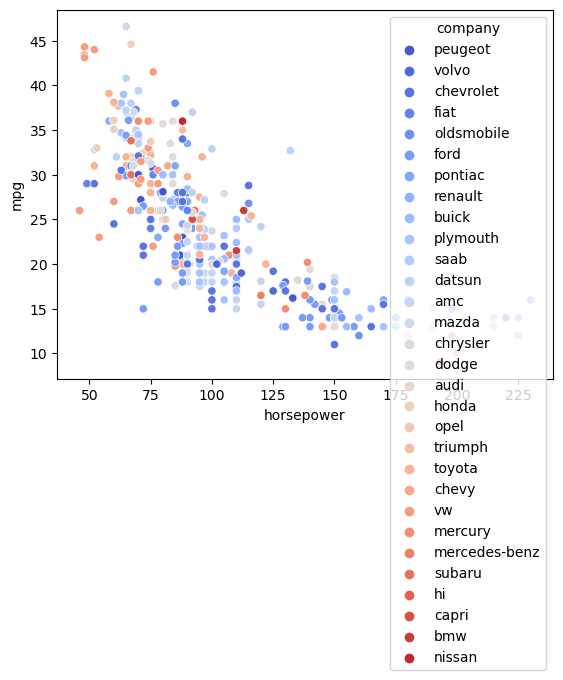

In [60]:
sns.scatterplot(x="horsepower", y="mpg", hue="company", data=df,
               palette="coolwarm")
plt.show()

    
    Encoding -> Cat to numerical
    
    Scaling 
    
    Missing Values
    
    Custom Transformers
    
    Data Pipeline